In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import mplleaflet as ml
import requests
import fiona
%matplotlib inline

Flying from Miami to DC, we decided to play with the in flight wifi.

American Airlines gives you the following json interface, we are going to try to put it on a map.

At first we had trouble getting connected, the solution was to manually insert the DNS entry 172.19.134.2

In [2]:
%%bash
curl http://airborne.gogoinflight.com/abp/ws/absServices/statusTray | python -m json.tool

{
    "Response": {
        "flightInfo": {
            "HSpeed": 256.557,
            "VSpeed": -0.77216,
            "abpVersion": "4.0.4",
            "acpuVersion": "6.4.0",
            "airlineCode": "AAL",
            "airlineCodeIata": "AA",
            "airlineName": "American Airlines",
            "altitude": 9443.618,
            "departureAirportCode": "KMIA",
            "departureAirportCodeIata": "MIA",
            "destination": "DCA",
            "destinationAirportCode": "KDCA",
            "destinationAirportCodeIata": "DCA",
            "expectedArrival": "2016-06-06T13:28:00Z",
            "flightNumberAlpha": "AAL",
            "flightNumberInfo": "AAL1359",
            "flightNumberNumeric": 1359,
            "latitude": 33.314,
            "localTime": "2016-06-06T12:18:03.336Z0:0",
            "longitude": -79.9612,
            "origin": "MIA",
            "tailNumber": "N905AN",
            "utcTime": "2016-06-06T12:18:03.336Z",
            "videoService": fal

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   868  100   868    0     0    536      0  0:00:01  0:00:01 --:--:--   536


In [3]:
url = 'http://airborne.gogoinflight.com/abp/ws/absServices/statusTray'
r = requests.get(url)

In [4]:
r.json()

{u'Response': {u'flightInfo': {u'HSpeed': 256.557,
   u'VSpeed': -0.77216,
   u'abpVersion': u'4.0.4',
   u'acpuVersion': u'6.4.0',
   u'airlineCode': u'AAL',
   u'airlineCodeIata': u'AA',
   u'airlineName': u'American Airlines',
   u'altitude': 9443.618,
   u'departureAirportCode': u'KMIA',
   u'departureAirportCodeIata': u'MIA',
   u'destination': u'DCA',
   u'destinationAirportCode': u'KDCA',
   u'destinationAirportCodeIata': u'DCA',
   u'expectedArrival': u'2016-06-06T13:28:00Z',
   u'flightNumberAlpha': u'AAL',
   u'flightNumberInfo': u'AAL1359',
   u'flightNumberNumeric': 1359,
   u'latitude': 33.314,
   u'localTime': u'2016-06-06T12:18:03.336Z0:0',
   u'longitude': -79.9612,
   u'origin': u'MIA',
   u'tailNumber': u'N905AN',
   u'utcTime': u'2016-06-06T12:18:03.336Z',
   u'videoService': False},
  u'gogoFacts': u'In 1973, AA became the first major airline to employ a female pilot when Bonnie Tiburzi was hired to fly Boeing 727s.',
  u'serviceInfo': {u'quality': u'Good',
   u'rem

In [5]:
df = pd.read_json(r.text)
df

,Response
flightInfo,"{u'origin': u'MIA', u'abpVersion': u'4.0.4', u..."
gogoFacts,"In 1973, AA became the first major airline to ..."
serviceInfo,"{u'quality': u'Good', u'remaining': 26460, u's..."
status,200


In [6]:
info = pd.io.json.json_normalize(df['Response']['flightInfo'])

In [7]:
info

,HSpeed,VSpeed,abpVersion,acpuVersion,airlineCode,airlineCodeIata,airlineName,altitude,departureAirportCode,departureAirportCodeIata,...,flightNumberAlpha,flightNumberInfo,flightNumberNumeric,latitude,localTime,longitude,origin,tailNumber,utcTime,videoService
0,256.557,-0.77216,4.0.4,6.4.0,AAL,AA,American Airlines,9443.618,KMIA,MIA,...,AAL,AAL1359,1359,33.314,2016-06-06T12:18:03.336Z0:0,-79.9612,MIA,N905AN,2016-06-06T12:18:03.336Z,False


In [8]:
# Let's make a funcion that takes in this data frame and appends the current data
def flight(data=None, url='http://airborne.gogoinflight.com/abp/ws/absServices/statusTray'):
    '''Returns a modified dataframe object'''
    r = requests.get(url)
    
    new_data = pd.read_json(r.text)

    info = pd.io.json.json_normalize(new_data['Response']['flightInfo'])
        
    if data is None:
        data = info
    else:
        data = pd.concat([data, info])
        
    data.set_index('utcTime')

    return data

In [9]:
df = flight()

In [10]:
df

,HSpeed,VSpeed,abpVersion,acpuVersion,airlineCode,airlineCodeIata,airlineName,altitude,departureAirportCode,departureAirportCodeIata,...,flightNumberAlpha,flightNumberInfo,flightNumberNumeric,latitude,localTime,longitude,origin,tailNumber,utcTime,videoService
0,256.557,-0.77216,4.0.4,6.4.0,AAL,AA,American Airlines,9443.618,KMIA,MIA,...,AAL,AAL1359,1359,33.314,2016-06-06T12:18:03.336Z0:0,-79.9612,MIA,N905AN,2016-06-06T12:18:03.336Z,False


In [11]:
df = flight(data=df)

In [12]:
df

,HSpeed,VSpeed,abpVersion,acpuVersion,airlineCode,airlineCodeIata,airlineName,altitude,departureAirportCode,departureAirportCodeIata,...,flightNumberAlpha,flightNumberInfo,flightNumberNumeric,latitude,localTime,longitude,origin,tailNumber,utcTime,videoService
0,256.557,-0.77216,4.0.4,6.4.0,AAL,AA,American Airlines,9443.618,KMIA,MIA,...,AAL,AAL1359,1359,33.314,2016-06-06T12:18:03.336Z0:0,-79.9612,MIA,N905AN,2016-06-06T12:18:03.336Z,False
0,256.557,-0.77216,4.0.4,6.4.0,AAL,AA,American Airlines,9443.618,KMIA,MIA,...,AAL,AAL1359,1359,33.314,2016-06-06T12:18:03.336Z0:0,-79.9612,MIA,N905AN,2016-06-06T12:18:03.336Z,False


In [13]:
df.set_index('utcTime')

,HSpeed,VSpeed,abpVersion,acpuVersion,airlineCode,airlineCodeIata,airlineName,altitude,departureAirportCode,departureAirportCodeIata,...,expectedArrival,flightNumberAlpha,flightNumberInfo,flightNumberNumeric,latitude,localTime,longitude,origin,tailNumber,videoService
utcTime,,,,,,,,,,,,,,,,,,,,,
2016-06-06T12:18:03.336Z,256.557,-0.77216,4.0.4,6.4.0,AAL,AA,American Airlines,9443.618,KMIA,MIA,...,2016-06-06T13:28:00Z,AAL,AAL1359,1359,33.314,2016-06-06T12:18:03.336Z0:0,-79.9612,MIA,N905AN,False
2016-06-06T12:18:03.336Z,256.557,-0.77216,4.0.4,6.4.0,AAL,AA,American Airlines,9443.618,KMIA,MIA,...,2016-06-06T13:28:00Z,AAL,AAL1359,1359,33.314,2016-06-06T12:18:03.336Z0:0,-79.9612,MIA,N905AN,False


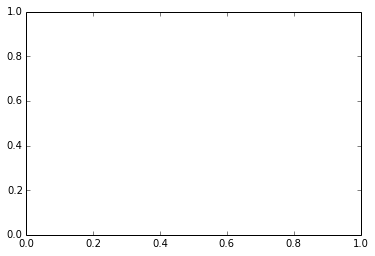

In [14]:
plt.hold(True)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


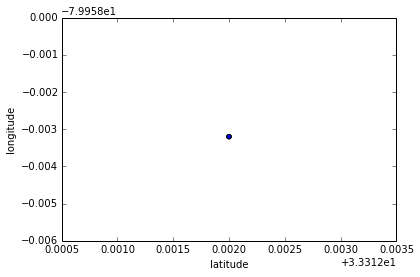

In [23]:
df.plot(x='latitude', y='longitude', kind='scatter')

In [29]:
ml.display()

In [33]:
df[['longitude', 'latitude', 'altitude']] = df[['longitude', 'latitude', 'altitude']].astype(float)

In [35]:
df.set_index('utcTime')
df

,HSpeed,VSpeed,abpVersion,acpuVersion,airlineCode,airlineCodeIata,airlineName,altitude,departureAirportCode,departureAirportCodeIata,...,flightNumberAlpha,flightNumberInfo,flightNumberNumeric,latitude,localTime,longitude,origin,tailNumber,utcTime,videoService
0,256.557,-0.77216,4.0.4,6.4.0,AAL,AA,American Airlines,9443.618,KMIA,MIA,...,AAL,AAL1359,1359,33.314,2016-06-06T12:18:03.336Z0:0,-79.9612,MIA,N905AN,2016-06-06T12:18:03.336Z,False
0,256.557,-0.77216,4.0.4,6.4.0,AAL,AA,American Airlines,9443.618,KMIA,MIA,...,AAL,AAL1359,1359,33.314,2016-06-06T12:18:03.336Z0:0,-79.9612,MIA,N905AN,2016-06-06T12:18:03.336Z,False


In [36]:
import us

In [48]:
def get_states():
    contiguous = [state for state in us.states.STATES if state.is_contiguous]
    shapefiles = [state.shapefile_urls()['state'] for state in contiguous]

    return dict(zip(contiguous, shapefiles))

In [49]:
def get_boundaries(states):
    """Takes in a dictionary with states and zip files, returns a dictionarty with states and boundaries"""
    # Download zip file
    # unzip it and open it with shapely
    

{<State:Arizona>: u'http://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_04_state10.zip',
 <State:Arkansas>: u'http://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_05_state10.zip',
 <State:California>: u'http://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_06_state10.zip',
 <State:Alabama>: u'http://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_01_state10.zip',
 <State:Colorado>: u'http://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_08_state10.zip',
 <State:Texas>: u'http://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_48_state10.zip',
 <State:Utah>: u'http://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_49_state10.zip',
 <State:Vermont>: u'http://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_50_state10.zip',
 <State:Virginia>: u'http://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_51_state10.zip',
 <State:Washington>: u'http://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_53_state10.zip',
 <Stat

In [51]:
%%bash
curl -O http://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_04_state10.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  105k  100  105k    0     0   308k      0 --:--:-- --:--:-- --:--:--  308k


In [54]:
%%bash
unzip tl_2010_04_state10.zip

Archive:  tl_2010_04_state10.zip
  inflating: tl_2010_04_state10.dbf  
  inflating: tl_2010_04_state10.prj  
  inflating: tl_2010_04_state10.shp  
  inflating: tl_2010_04_state10.shp.xml  
  inflating: tl_2010_04_state10.shx  


In [55]:

shp = fiona.open('tl_2010_04_state10.shp')

NameError: name 'fiona' is not defined